# Project: Investigate No-Show Appointment Dataset 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

A number of characteristics about the patient are included in each row.

 - `ScheduledDay` tells us on what day the patient set up their appointment.
 - `Neighborhood` indicates the location of the hospital.
 - `Scholarship ` indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
 -  The encoding of the last column: it says 
       - ‘No’ if the patient showed up to their appointment 
       - ‘Yes’ if they did not show up.

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load your data and print out a few lines

NoShow_df=pd.read_csv('NoShow_App.csv')
NoShow_df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
## Properties of Dataset
NoShow_df.shape

(110527, 14)

In [4]:
NoShow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
NoShow_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
NoShow_df.describe(include=[np.object])

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


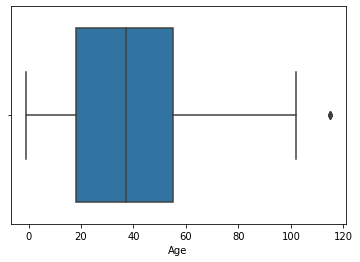

In [7]:
sns.boxplot(NoShow_df['Age']);

In [8]:
NoShow_df.duplicated().sum()

0

## Univariate Analysis

In [9]:
variable_list=['Hypertension','Scholarship','Diabetes','Alcoholism','SMS_received','Gender']

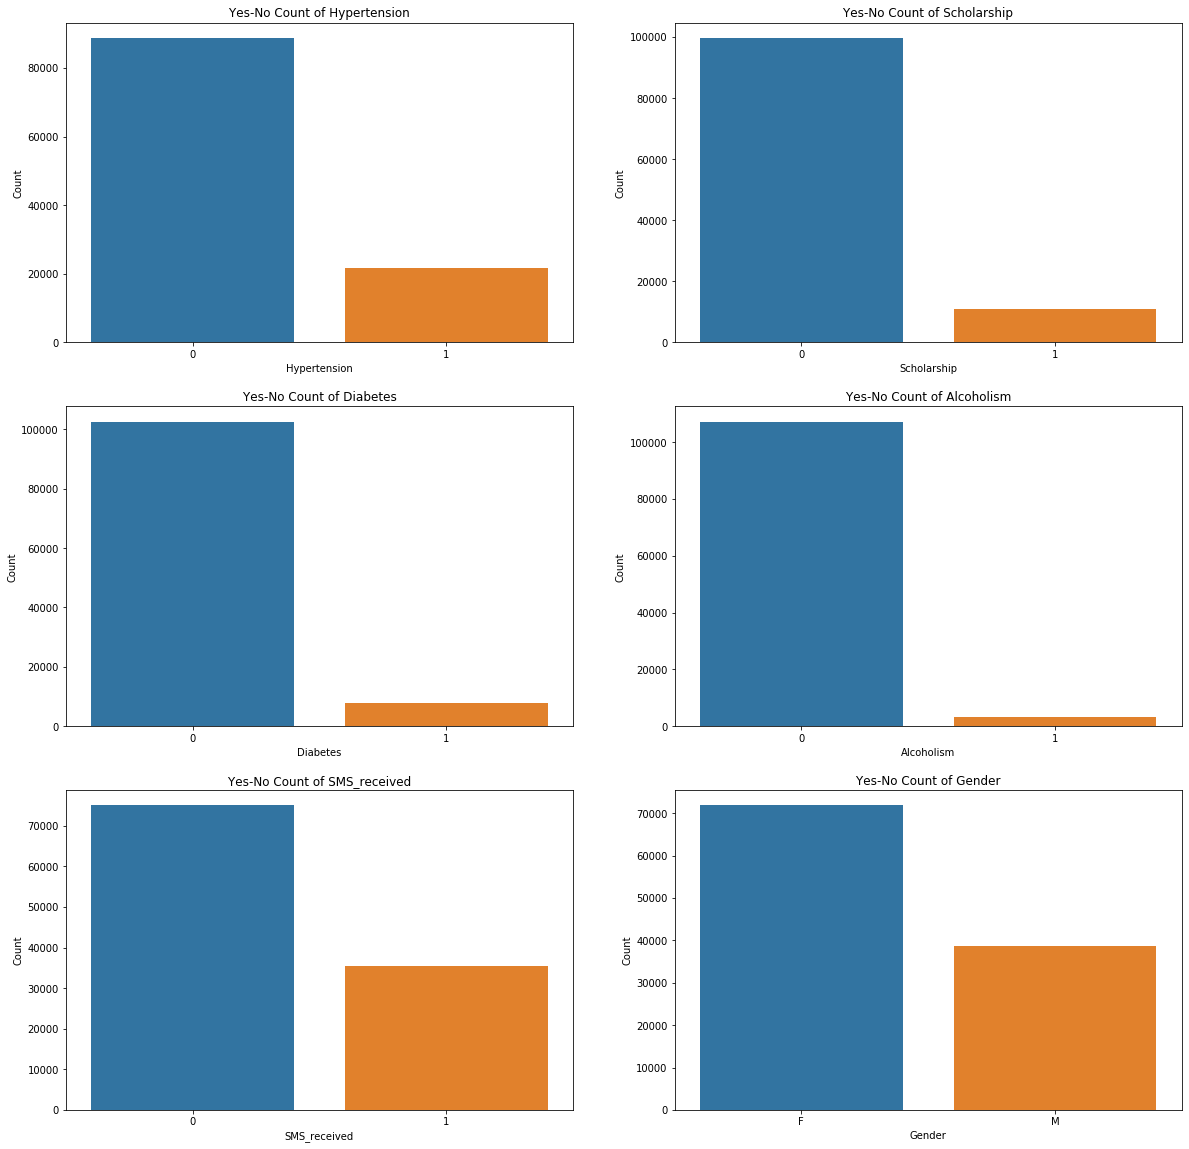

In [10]:
fig, ax= plt.subplots(3,2,figsize=(20,20));
n=0
for row in range(3):
    for col in range(2):
        g=sns.countplot(NoShow_df[variable_list[int(n)]],ax=ax[row][col])
        ax[row,col].set_title(" Yes-No Count of {} ".format(variable_list[int(n)]))
        ax[row,col].set_xlabel(variable_list[int(n)])
        ax[row,col].set_ylabel("Count")
        #plt.legend()
        n+=1
plt.show();
            


 **Observations**:
 
 Uptil now be have found the following facts about this dataset: 
 
 - There are total of `110527` observations and `14` columns.
 - There are `no missing` values and `no duplicates` in the dataset.
 - The Age varaible has  unreal values and outliers which we have to remove from the dataset.
 - The data types for `ScheduledDay` and `AppointmentDay` can be changed to date datatype.
 - For the analysis we do not require `PatientID` and `AppointmentID` and can be removed.
 - The `Handicap` variable is a binary categorical variable but has 4 categories which is incorrect.
 - The analysis will be more eaiser if we can convert the `No-show` and `Gender` into binary categorical varialbe. 
                   

### Data Cleaning 

> In the data cleaning part, all the outliers and non-significant values in `Age` variable are removed. Non- required variables like `PatientID` and `AppointmentID` are dropped. The `Handicap` variable field is cleaned and additional values are removed.
The data types of variables `ScheduledDay` and `AppointmentDay` are changed.
An additional varialbe `AppointmentAfter` is added to the dataframe which shows the total number of days between the schdeuled date and appointment date. Observations are removed where days have negative values.
Also variables `No-show` is encoded into binary categorical values.
 - 1:  ‘No’ if the patient showed up to their appointment
 - 0 :‘Yes’ if they did not show up.


In [11]:
NoShow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
## Dropping PatientID and AppointmentID from dataframe

NoShow_df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

In [13]:
## Filtering out the outliers in the age

NoShow_df = NoShow_df[NoShow_df.Age>0]
NoShow_df = NoShow_df[NoShow_df.Age<101]


In [14]:
NoShow_df['Age'].describe()

count    106980.000000
mean         38.311311
std          22.459144
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         100.000000
Name: Age, dtype: float64

In [15]:
## Dropping the values of Handicap varialble which is >1

NoShow_df= NoShow_df[NoShow_df.Handicap<2]

In [16]:
NoShow_df['Handicap'].value_counts()

0    104744
1      2037
Name: Handicap, dtype: int64

In [17]:
# Changing the data type for ScheduledDay and AppointmentDay

NoShow_df['ScheduledDay'] = NoShow_df['ScheduledDay'].astype('datetime64[ns]')
NoShow_df['AppointmentDay'] = NoShow_df['AppointmentDay'].astype('datetime64[ns]')


In [18]:
NoShow_df['ScheduledDay'] = NoShow_df['ScheduledDay'].dt.date
NoShow_df['AppointmentDay'] = NoShow_df['AppointmentDay'].dt.date

In [19]:
# Calculating the days difference between scheduling day and appointment day
NoShow_df['AppointmentAfter'] = NoShow_df['AppointmentDay']-NoShow_df['ScheduledDay']

In [20]:
# Changing the data type of the calcualted feature to int

NoShow_df['AppointmentAfter'] = NoShow_df['AppointmentAfter'].astype('timedelta64[D]').astype(int)

In [21]:
NoShow_df = NoShow_df[NoShow_df.AppointmentAfter>-1]

In [22]:
# Encoding the Dependent variable
App_Status={"Yes":0,"No":1}
NoShow_df['No-show']=NoShow_df['No-show'].map(App_Status)

In [23]:
# Renaming the Dependent coloumns
NoShow_df = NoShow_df.rename(columns={'No-show': 'No_show'})

In [24]:
NoShow_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,AppointmentAfter
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0


In [37]:
NoShow_df.shape

(106776, 13)

<a id='eda'></a>
## Exploratory Data Analysis

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [25]:
# Creating mask for our dependent variables
show = NoShow_df['No_show']== False
noshow= NoShow_df['No_show']== True

In [26]:
## To check if sms-received affects the showing up of patients
NoShow_df.SMS_received[noshow].mean()

0.2933583886311586

In [27]:
NoShow_df.SMS_received[show].mean()

0.44191207063936017

 - Peopel who receive SMS turned up for there appointment

In [40]:
NoShow_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,AppointmentAfter
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0


,Age
count,106776.000000
mean,38.294739
std,22.445968
min,1.000000
25%,19.000000
50%,38.000000
75%,56.000000
max,100.000000


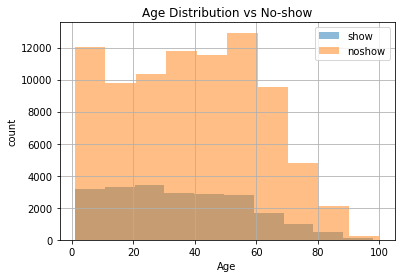

In [30]:
NoShow_df.Age[show].hist(alpha=0.5, label='show')
NoShow_df.Age[noshow].hist(alpha=0.5, label='noshow')
plt.xlabel('Age')
plt.ylabel('count')
plt.title("Age Distribution vs No-show")
plt.legend();
pd.DataFrame(NoShow_df['Age'].describe())

The above graph shows that counts of people which showed for their appointment in very less than count of no-show. However, we can say that people in age group 20-30 have the highest counts of showing for appointment and people between age group of 50-60 has the highest count of not showing for the appointment.

## Bi-Variate Analysis

No_show
Gender Alcoholism          
F      0           0.797386
       1           0.748160
M      0           0.797362
       1           0.827619

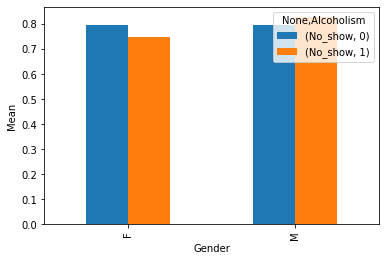

In [32]:
NoShow_df.groupby(['Gender','Alcoholism'])[['No_show']].mean().unstack().plot(kind='bar').set_ylabel('Mean');
NoShow_df.groupby(['Gender','Alcoholism'])[['No_show']].mean()

From the graph above we can see that the Male who are Alcoholic are more inclined to miss the appointment that Female.

No_show
Gender SMS_received          
F      0             0.834875
       1             0.721756
M      0             0.829348
       1             0.726448

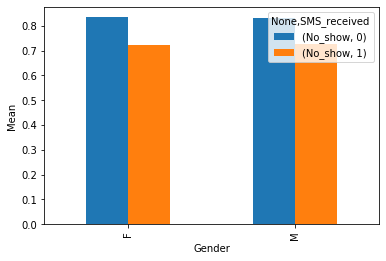

In [48]:
NoShow_df.groupby(['Gender','SMS_received'])[['No_show']].mean().unstack().plot(kind='bar').set_ylabel('Mean');
NoShow_df.groupby(['Gender','SMS_received'])[['No_show']].mean()

From the graph above opting for SMS alert does not have any significant effect on the increment in the appointment show-up.

No_show
Gender Hypertension          
F      0             0.787918
       1             0.827327
M      0             0.793088
       1             0.827575

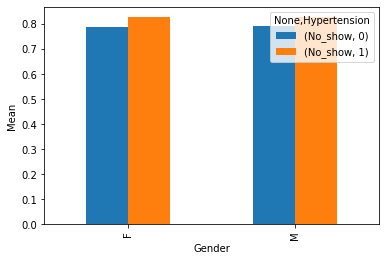

In [34]:
NoShow_df.groupby(['Gender','Hypertension'])[['No_show']].mean().unstack().plot(kind='bar').set_ylabel('Mean');
NoShow_df.groupby(['Gender','Hypertension'])[['No_show']].mean()

From the graph medical conditions like `Hypertension`does not have any significant effect on the increment in the appointment show-up.

No_show
Gender Diabetes          
F      0         0.794595
       1         0.818817
M      0         0.797516
       1         0.822845

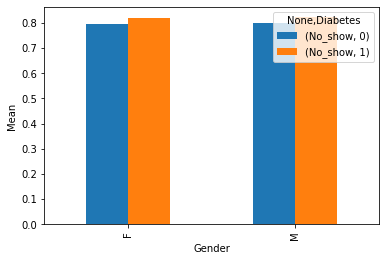

In [35]:
NoShow_df.groupby(['Gender','Diabetes'])[['No_show']].mean().unstack().plot(kind='bar').set_ylabel('Mean');
NoShow_df.groupby(['Gender','Diabetes'])[['No_show']].mean()


From the graph medical conditions`Diabetes` not have any significant effect on the increment in the appointment show-up.

No_show
Gender Handicap          
F      0         0.796147
       1         0.818723
M      0         0.798424
       1         0.827907

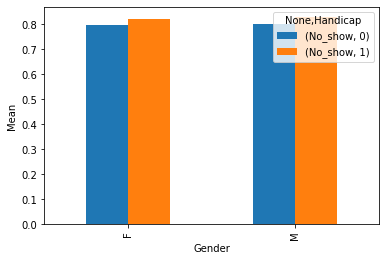

In [36]:
NoShow_df.groupby(['Gender','Handicap'])[['No_show']].mean().unstack().plot(kind='bar').set_ylabel('Mean');
NoShow_df.groupby(['Gender','Handicap'])[['No_show']].mean()
#sns.countplot(data=NoShow_df,x='Handicap',hue='No_show');
#plt.title("Handicap vs No-show");

The above graph shows that physical disability does not influence the no show to the appointment for both gender as the difference is very minimal. 

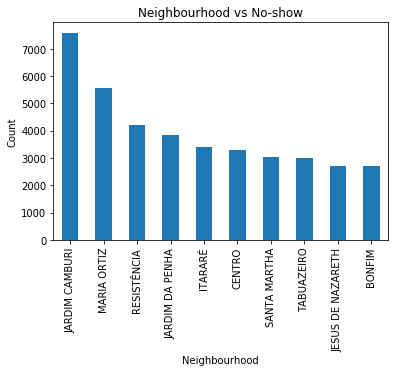

In [122]:
NoShow_df['Neighbourhood'].value_counts().head(10).plot(kind='bar');
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title("Neighbourhood vs No-show");

The above chart shows the Top 10 neighbourhood from where the the patient were. *Jardim Camburi* has the largest number of appointment booking

<a id='conclusions'></a>
## Conclusions

In the conclusion we can say that the opting for SMS-alert does not show any signicficant difference in the appointment showup.
Patient of age group between 20-30 years were the highest in number to showup for the appointment.Medical condition does not affect the appointment show up.

## Limitation

- The new cleaned data has `106776`rows and `13`columns and is a part of sample, analysis may vary if we have more data.